# Alpaca Demo

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

In [2]:
# Load .env environment variables
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Set the paper URL
base_url = 'https://paper-api.alpaca.markets'

In [4]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [8]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    base_url,
    api_version="v2")
alpaca

In [9]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()
today

'2020-07-14T00:00:00-04:00'

In [10]:
# Set the tickers
tickers = ["FB", "TWTR"]

In [11]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"

In [14]:
# Get current closing prices for FB and TWTR
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Display sample data
df_portfolio

FB                                     TWTR  \
                             open    high     low   close    volume   open   
time                                                                         
2020-07-14 00:00:00-04:00  236.76  240.33  232.03  239.73  21476590  33.53   

                                                         
                            high    low close    volume  
time                                                     
2020-07-14 00:00:00-04:00  34.66  33.44  34.4  14732534

In [16]:
# Format start and end dates as ISO format for one year period
start = pd.Timestamp("2019-07-14", tz="America/New_York").isoformat()
end = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()

In [17]:
# Get closing prices for FB and TWTR from the last year
df_portfolio_year = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end
).df

# Display sample data
df_portfolio_year.head(10)

FB                                        TWTR  \
                             open     high       low   close    volume   open   
time                                                                            
2020-02-21 00:00:00-05:00  213.48  214.237  208.8305  210.16  12671114  38.67   
2020-02-24 00:00:00-05:00  201.80  203.650  198.1700  200.73  20406271  36.50   
2020-02-25 00:00:00-05:00  202.47  203.500  195.9537  196.64  18833578  36.18   
2020-02-26 00:00:00-05:00  197.19  201.210  195.4900  197.18  15234727  35.28   
2020-02-27 00:00:00-05:00  191.99  195.880  189.5000  189.69  19313106  33.73   
2020-02-28 00:00:00-05:00  182.61  192.740  181.8200  192.74  28054197  31.86   
2020-03-02 00:00:00-05:00  194.10  196.570  188.8500  196.54  21795546  36.00   
2020-03-03 00:00:00-05:00  196.22  197.240  183.9700  185.89  24693345  36.01   
2020-03-04 00:00:00-05:00  189.05  191.830  186.3900  191.79  20486825  35.76   
2020-03-05 00:00:00-05:00  186.78  188.990  183.8901  185.02  21975861  35.03   

                                                             
                            high     low    close    volume  
time                                                         
2020-02-21 00:00:00-05:00  38.75  38.040  38.3085  13994657  
2020-02-24 00:00:00-05:00  36.59  35.310  35.8900  22443589  
2020-02-25 00:00:00-05:00  36.45  34.885  35.2000  17663792  
2020-02-26 00:00:00-05:00  35.82  34.435  34.6400  14642081  
2020-02-27 00:00:00-05:00  34.20  32.470  33.0100  23928384  
2020-02-28 00:00:00-05:00  33.37  31.510  33.2000  29066204  
2020-03-02 00:00:00-05:00  36.86  35.140  35.8200  35162445  
2020-03-03 00:00:00-05:00  36.48  34.410  34.9300  21168858  
2020-03-04 00:00:00-05:00  36.00  34.770  35.9900  11054107  
2020-03-05 00:00:00-05:00  35.73  34.520  34.9700  12075995

In [18]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of FB and TWTR
df_closing_prices["FB"] = df_portfolio_year["FB"]["close"]
df_closing_prices["TWTR"] = df_portfolio_year["TWTR"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.head(10)

,FB,TWTR
2020-02-21,210.16,38.3085
2020-02-24,200.73,35.8900
2020-02-25,196.64,35.2000
2020-02-26,197.18,34.6400
2020-02-27,189.69,33.0100
2020-02-28,192.74,33.2000
2020-03-02,196.54,35.8200
2020-03-03,185.89,34.9300
2020-03-04,191.79,35.9900
2020-03-05,185.02,34.9700


In [19]:
# Compute daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns.head()

,FB,TWTR
2020-02-24,-0.044871,-0.063132
2020-02-25,-0.020376,-0.019225
2020-02-26,0.002746,-0.015909
2020-02-27,-0.037986,-0.047055
2020-02-28,0.016079,0.005756


<AxesSubplot:title={'center':'Daily Returns of FB and TWTR over the Last Year'}>

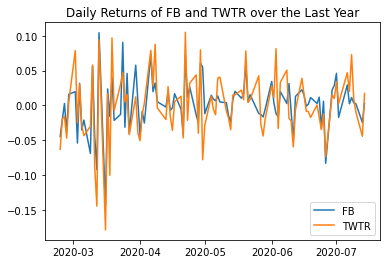

In [20]:
# Plot daily returns
df_daily_returns.plot(title="Daily Returns of FB and TWTR over the Last Year")